# Course Project for COMP 4151 and 6151

**Part 1 is due on Oct 7, 2021. Before Class**


The goal of the project is let you uncover interesting relationships from a given dataset.

The project consists of a sequence of weekly assignments and reports.

The dataset you will work on has information about colleges and universities.  

All of us have seen this data for the first time.  In other words, we do not know if any interesting relationships exist in this data.

To uncover interesting relationships, we need to:

1. Ask interesting questions to hypothesize about a relationship.
2. Model and validate the relationship.

In this course, we have learned how to model a relationship between a set of features X, and a target variable y.  Technically, this can be done easily with sklearn, after we select a model: 
```
    model.fit(X,y)
```

In in-class examples or assignments, we are often told what X and y should be.  Here, we are not told what X and y are, because we do not know what they are.  The goal of the project is to discover what they are.

Technically, once we hypothesize about a relationship between X and y, we can evaluate that relationship by **cross-validating the model**.

At this time, you should already know the technical requirements and steps to model relationships and evaluate those relationships.

**Expectations**

+ Come up with *interesting* questions.
+ Come up with *interesting* hypotheses.
+ Demonstrate your technical ability by properly *modeling* the relationships in your hypotheses.
+ Demonstrate your technical ability by properly *evaluating* your hypotheses.
+ Draw proper conclusion. Analyze your hypotheses and possibly revise and improve them.

If a relationship between X and y appears *interesting* to people, either a positive confirmation or a lack of confirmation (rebuttal or disconfirmation) is valuable.

### The dataset

In [1]:
import pandas
df = pandas.read_csv('../Datasets/college_data.csv')

In [2]:
print('There are', len(df.columns), 'columns.')
print(df.columns)

There are 145 columns.
Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=145)


### An example of a hypothesis

Hypothesis: there is a relationship between the number of graduated BS's and the percent of admission.

To verify this hypothesis, we need 
1. Determine what X and y are.
2. Attempt to visualize the relationship to see if there is one. This is problematic if X is multidimensional.
3. Attempt to model and (cross)validate the relationship.
4. Draw your conclusions.  Possibly go back to step 1, or revise our hypothesis.

#### Determining features (X) and the target variable (y)

Figure out which columns are needed. There are many ways to do this.

In [3]:
[col for col in df.columns if 'award' in col]

["Associate's degrees awarded",
 "Bachelor's degrees awarded",
 "Master's degrees awarded",
 "Doctor's degrese - research/scholarship awarded",
 "Doctor's degrees - professional practice awarded",
 "Doctor's degrees - other awarded",
 'Certificates of less than 1-year awarded',
 'Certificates of 1 but less than 2-years awarded',
 'Certificates of 2 but less than 4-years awarded',
 'Postbaccalaureate certificates awarded',
 "Post-master's certificates awarded"]

In [4]:
[col for col in df.columns if 'admit' in col]

['Percent admitted - total']

In [5]:
my_data = df[['Percent admitted - total', "Bachelor's degrees awarded"]]
print('Data points:', len(my_data))
print(my_data.isna().sum())
print('After removing missing data:', len(my_data.dropna()))
print(my_data.head())

Data points: 1534
Percent admitted - total      158
Bachelor's degrees awarded      2
dtype: int64
After removing missing data: 1376
   Percent admitted - total  Bachelor's degrees awarded
0                      90.0                       604.0
1                      87.0                      2195.0
2                       NaN                        68.0
3                      81.0                      1099.0
4                      51.0                       600.0


In [6]:
print('Removing missing data.')
my_data = my_data.dropna()
print(my_data)

Removing missing data.
      Percent admitted - total  Bachelor's degrees awarded
0                         90.0                       604.0
1                         87.0                      2195.0
3                         81.0                      1099.0
4                         51.0                       600.0
5                         57.0                      5000.0
...                        ...                         ...
1516                      60.0                       148.0
1525                      44.0                       826.0
1529                      35.0                       556.0
1530                      71.0                        75.0
1532                      53.0                        20.0

[1376 rows x 2 columns]


#### Modeling and validating the relationship

This is a regression problem. [Skip explanation]

X is 1-dimensional. Let's visualize this relationship.

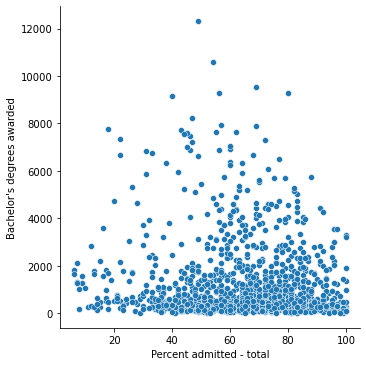

In [7]:
import seaborn
seaborn.relplot(data=my_data, x="Percent admitted - total", y="Bachelor's degrees awarded")

This doesn't look like there's a relationship.  Let's validate the model.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_validate

X = my_data[['Percent admitted - total']]
y = my_data[["Bachelor's degrees awarded"]]
model = LinearRegression()
result = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=100))
result['test_score'].mean()

-0.006917493851361072

Based on averaged R2 scores of 100 shuffle and split cross validation, there does not seem to be a linear relationshiop between the number of BS degrees awarded and the percentage of admission.

Please see the HTML-formatted report.

In [9]:
import pandas as pd

pd.set_option('display.max_columns', None)
display(df.head())

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

In [10]:
df.describe()

,ID number,year,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are American Indian or Alaska Native,Percent of graduate enrollment that are Asian,Percent of graduate enrollment that are Black or African American,Percent of graduate enrollment that are Hispanic/Latino,Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of graduate

In [11]:
df['State abbreviation'].unique(), df['State abbreviation'].nunique()

(array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
        'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
        'New Jersey', 'New Mexico', 'New York', 'North Carolina',
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
        'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
        'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object),
 51)

In [12]:
df['Sector of institution'].value_counts(dropna = False)

Private not-for-profit, 4-year or above    971
Public, 4-year or above                    563
Name: Sector of institution, dtype: int64

In [13]:
df['Level of institution'].value_counts(dropna = False)

Four or more years    1534
Name: Level of institution, dtype: int64

In [14]:
df['Control of institution'].value_counts(dropna = False)

Private not-for-profit    971
Public                    563
Name: Control of institution, dtype: int64

In [15]:
df['Tribal college'].value_counts(dropna = False)

No    1534
Name: Tribal college, dtype: int64

In [16]:
pd.set_option("display.max_rows", None)
df.dtypes

ID number                                                                                   int64
Name                                                                                       object
year                                                                                        int64
ZIP code                                                                                   object
Highest degree offered                                                                     object
County name                                                                                object
Longitude location of institution                                                         float64
Latitude location of institution                                                          float64
Religious affiliation                                                                      object
Offers Less than one year certificate                                                      object
Offers One but less 

### Part 1 of the Project

**Deadline: Oct 7, 2021. Before Class**

**Problem 1**
Plot the geographical locations of the colleges and universities.

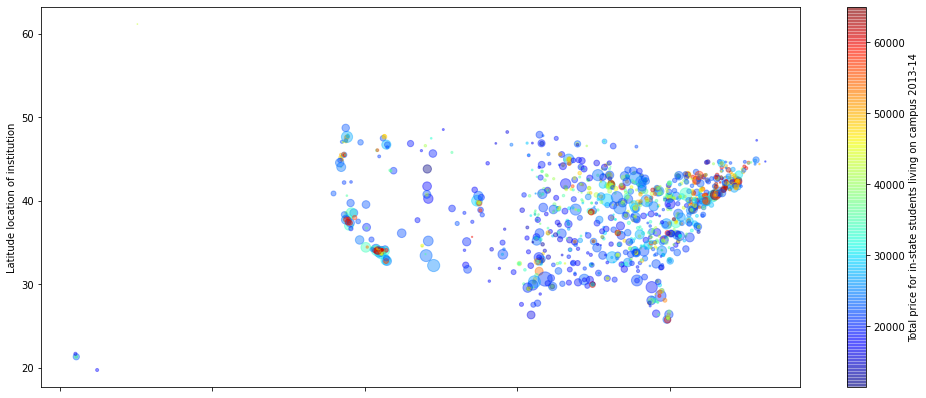

In [17]:
import matplotlib.pyplot as plt

df.plot(kind = 'scatter', 
        x = 'Longitude location of institution', y = 'Latitude location of institution', 
        c = 'Total price for in-state students living on campus 2013-14', 
        s = df['Enrolled total'] / 50, 
        alpha = .4, cmap = plt.get_cmap('jet'), figsize = (17, 7))

plt.show()

**Problem 2** Plot the numbers of colleges/universities in each state.

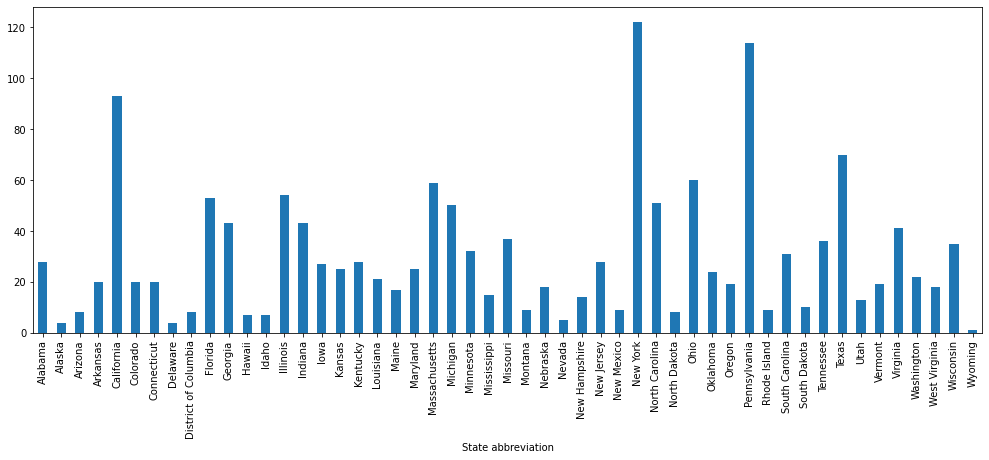

In [18]:
import numpy as np

coll_uni_count = df.groupby('State abbreviation')['Name'].count()
coll_uni_count.plot(kind = 'bar',
                    figsize = (17, 6))
plt.show()

**Problem 3** Plot the distributions of tuitions.

<AxesSubplot:xlabel='Tuition and fees, 2013-14', ylabel='Count'>

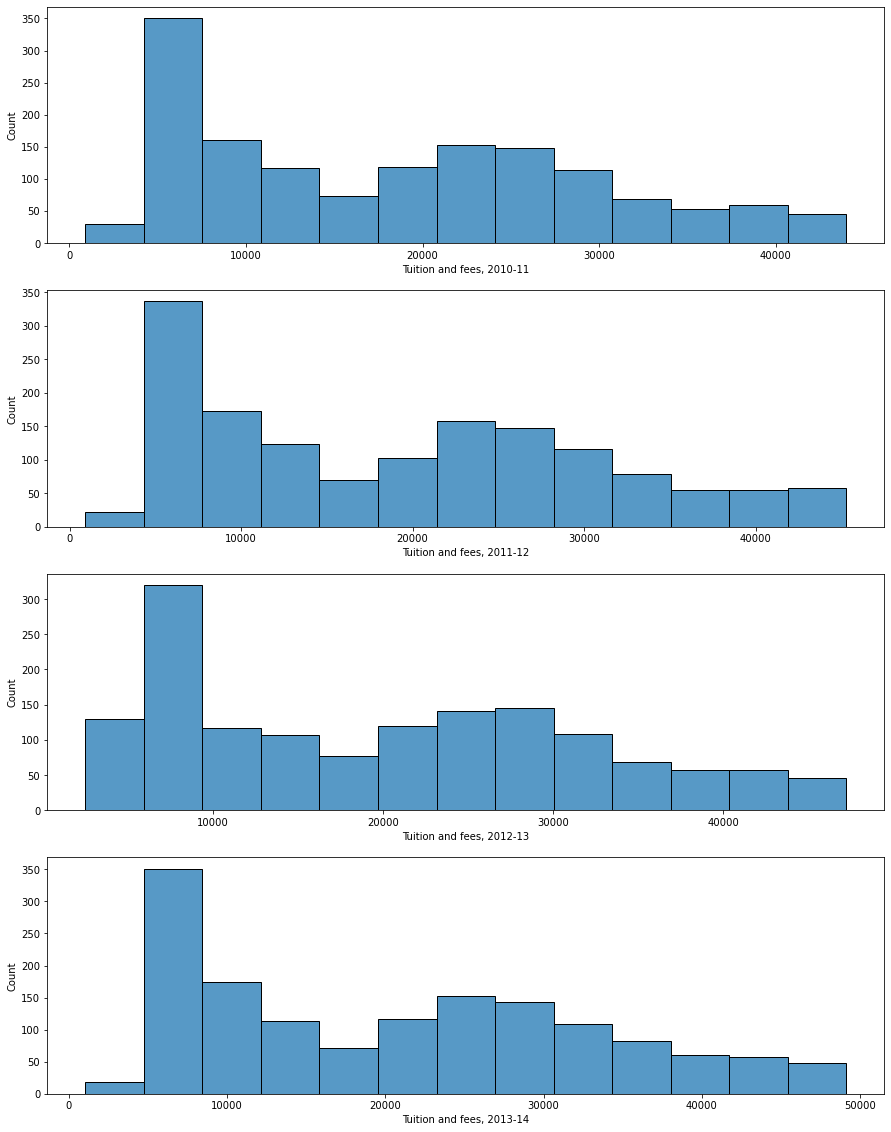

In [19]:
import seaborn as sns

fig, axes = plt.subplots(4, figsize = (15, 20), sharex = False, sharey = False)
sns.histplot(df['Tuition and fees, 2010-11'], ax = axes[0])
sns.histplot(df['Tuition and fees, 2011-12'], ax = axes[1])
sns.histplot(df['Tuition and fees, 2012-13'], ax = axes[2])
sns.histplot(df['Tuition and fees, 2013-14'], ax = axes[3])

**Problem 4** Divide the colleges and universities into 5 groups based on their tuitions.

The categories can be numeric, where 1 is the least expensive, and 5 is the most expensive.

In [20]:
df_tution_cost_univ = df[['Name', 'Tuition and fees, 2010-11', 'Tuition and fees, 2011-12', 'Tuition and fees, 2012-13', 'Tuition and fees, 2013-14']]
df_tution_cost_univ.head()

,Name,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14"
0,Alabama A & M University,5800.0,6828.0,7182.0,7182.0
1,University of Alabama at Birmingham,5806.0,6264.0,6798.0,7206.0
2,Amridge University,8360.0,8720.0,6800.0,6870.0
3,University of Alabama in Huntsville,7492.0,8094.0,8794.0,9192.0
4,Alabama State University,7164.0,8082.0,7932.0,8720.0


In [21]:
import warnings
warnings.filterwarnings('ignore')

df_tution_cost_univ['TF1112_vs_TF1011'] = df_tution_cost_univ['Tuition and fees, 2011-12'] - df_tution_cost_univ['Tuition and fees, 2010-11']
df_tution_cost_univ['TF1213_vs_TF1112'] = df_tution_cost_univ['Tuition and fees, 2012-13'] - df_tution_cost_univ['Tuition and fees, 2011-12']
df_tution_cost_univ['TF1314_vs_TF1213'] = df_tution_cost_univ['Tuition and fees, 2013-14'] - df_tution_cost_univ['Tuition and fees, 2012-13']
df_tution_cost_univ.head()


,Name,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",TF1112_vs_TF1011,TF1213_vs_TF1112,TF1314_vs_TF1213
0,Alabama A & M University,5800.0,6828.0,7182.0,7182.0,1028.0,354.0,0.0
1,University of Alabama at Birmingham,5806.0,6264.0,6798.0,7206.0,458.0,534.0,408.0
2,Amridge University,8360.0,8720.0,6800.0,6870.0,360.0,-1920.0,70.0
3,University of Alabama in Huntsville,7492.0,8094.0,8794.0,9192.0,602.0,700.0,398.0
4,Alabama State University,7164.0,8082.0,7932.0,8720.0,918.0,-150.0,788.0


In [22]:
df_tution_cost_univ[['TF1112_vs_TF1011', 'TF1213_vs_TF1112', 'TF1314_vs_TF1213']] = np.sign(df_tution_cost_univ[['TF1112_vs_TF1011', 'TF1213_vs_TF1112', 'TF1314_vs_TF1213']])
df_tution_cost_univ.head()

,Name,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",TF1112_vs_TF1011,TF1213_vs_TF1112,TF1314_vs_TF1213
0,Alabama A & M University,5800.0,6828.0,7182.0,7182.0,1.0,1.0,0.0
1,University of Alabama at Birmingham,5806.0,6264.0,6798.0,7206.0,1.0,1.0,1.0
2,Amridge University,8360.0,8720.0,6800.0,6870.0,1.0,-1.0,1.0
3,University of Alabama in Huntsville,7492.0,8094.0,8794.0,9192.0,1.0,1.0,1.0
4,Alabama State University,7164.0,8082.0,7932.0,8720.0,1.0,-1.0,1.0


In [23]:
df_tution_cost_univ['Tution_fee_increase_status'] = df_tution_cost_univ['TF1112_vs_TF1011'] + \
                                                    df_tution_cost_univ['TF1213_vs_TF1112'] + \
                                                    df_tution_cost_univ['TF1314_vs_TF1213']
df_tution_cost_univ.head()

,Name,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",TF1112_vs_TF1011,TF1213_vs_TF1112,TF1314_vs_TF1213,Tution_fee_increase_status
0,Alabama A & M University,5800.0,6828.0,7182.0,7182.0,1.0,1.0,0.0,2.0
1,University of Alabama at Birmingham,5806.0,6264.0,6798.0,7206.0,1.0,1.0,1.0,3.0
2,Amridge University,8360.0,8720.0,6800.0,6870.0,1.0,-1.0,1.0,1.0
3,University of Alabama in Huntsville,7492.0,8094.0,8794.0,9192.0,1.0,1.0,1.0,3.0
4,Alabama State University,7164.0,8082.0,7932.0,8720.0,1.0,-1.0,1.0,1.0


In [24]:
total_institutions = df_tution_cost_univ.shape[0]
print(f"Total number of institutions: {total_institutions}")
print("No. of years tution cost increased or at least remained the same across universities:")
print(df_tution_cost_univ['Tution_fee_increase_status'].value_counts())
print(f"We see that in the last 4 academic years the cost of tution has gradually increased for {(1264 / 1534) * 100} % universities.")

Total number of institutions: 1534
No. of years tution cost increased or at least remained the same across universities:
 3.0    1264
 2.0     108
 1.0      95
 0.0      18
-1.0       5
Name: Tution_fee_increase_status, dtype: int64
We see that in the last 4 academic years the cost of tution has gradually increased for 82.39895697522816 % universities.


* So it makes sense to take Tution and fees of the academic year 2013-14 which is the lastest tution fees information in the dataset.
* Divide the colleges and universities into 5 groups based on their tuitions of year 2013-14.

In [25]:
df['Tuition and fees, 2013-14'].describe()

count     1497.000000
mean     20727.490314
std      12455.805360
min       1032.000000
25%       8542.000000
50%      20060.000000
75%      29992.000000
max      49138.000000
Name: Tuition and fees, 2013-14, dtype: float64

In [26]:
df1 = df.copy()
bins = [1000, 10000, 20000, 30000, 40000, 50000]
group_names = ['least expensive', 'somewhat expensive', 'expensive', 'very expensive', 'most expensive']
df1['cost_status'] = pd.cut(df1['Tuition and fees, 2013-14'], bins, labels = group_names)
df1.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,State abbreviation,FIPS state code,Geographic region,Sector of institution,Level of institution,Control of institution,Historically Black College or University,Tribal college,Degree of urbanization (Urban-centric locale),Carnegie Classification 2010: Basic,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or

**Problem 5** Compare the graduation rate (BS degree) of colleges across the 5 groups.

In [27]:
gr_4yrs = df1.groupby('cost_status')['Graduation rate - Bachelor degree within 4 years, total'].agg(['mean', 'median'])
gr_4yrs

,mean,median
cost_status,,
least expensive,21.308534,19.0
somewhat expensive,31.712177,30.0
expensive,37.186170,37.0
very expensive,54.016736,55.0
most expensive,75.586466,80.0


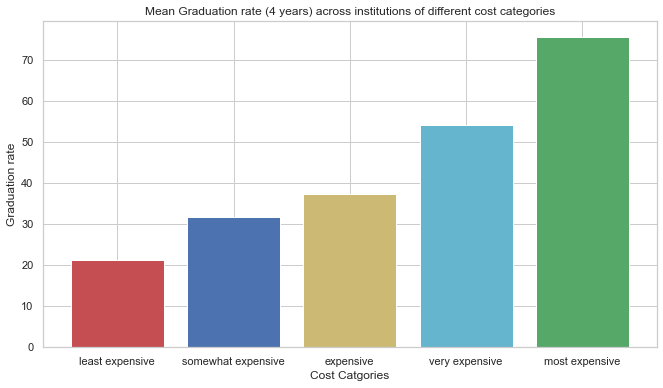

In [28]:
sns.set_theme(style = "whitegrid")
fig = plt.figure(figsize = (11, 6))
plt.bar(gr_4yrs.index, gr_4yrs['mean'], color = ['r', 'b', 'y', 'c', 'g'])
plt.title("Mean Graduation rate (4 years) across institutions of different cost categories")
plt.xlabel("Cost Catgories")
plt.ylabel("Graduation rate")
plt.show()

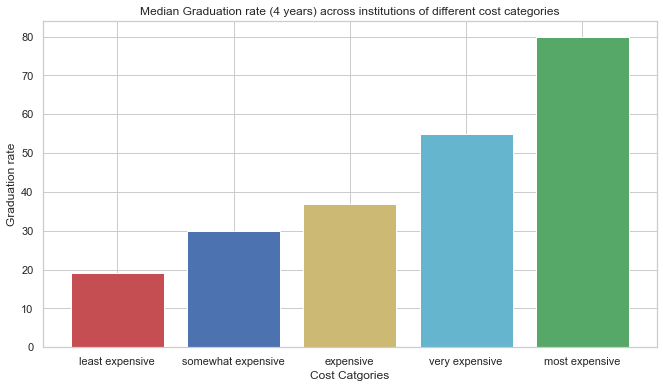

In [29]:
fig = plt.figure(figsize = (11, 6))
plt.bar(gr_4yrs.index, gr_4yrs['median'], color = ['r', 'b', 'y', 'c', 'g'])
plt.title("Median Graduation rate (4 years) across institutions of different cost categories")
plt.xlabel("Cost Catgories")
plt.ylabel("Graduation rate")
plt.show()

<AxesSubplot:xlabel='cost_status', ylabel='Graduation rate - Bachelor degree within 4 years, total'>

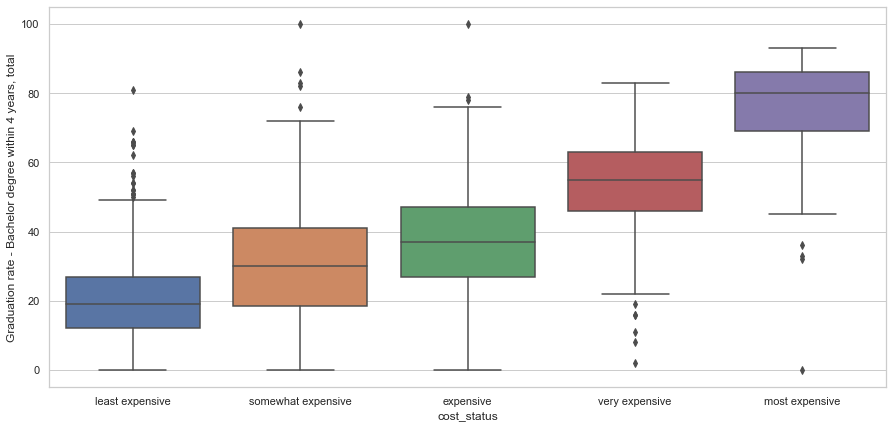

In [30]:
import seaborn as sns

fig = plt.figure(figsize = (15,7))
sns.boxplot(x = df1['cost_status'], y = df1['Graduation rate - Bachelor degree within 4 years, total'] )

**Problem 6** Come up with 3 hypotheses about the 3 different relationships.

### There is a relationship between SAT MATH 75th percentile score and Bachelor's degree awarded

In [31]:
data =  df[["SAT Math 75th percentile score", "Bachelor's degrees awarded"]]
print(f"Total datapoints {len(data)}")
print("Missing data:")
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

Total datapoints 1534
Missing data:
SAT Math 75th percentile score    352
Bachelor's degrees awarded          2
dtype: int64
SAT Math 75th percentile score    0
Bachelor's degrees awarded        0
dtype: int64


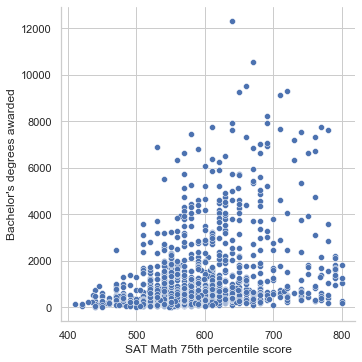

In [32]:
sns.relplot(data = data, x = "SAT Math 75th percentile score", y = "Bachelor's degrees awarded")

In [33]:
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.linear_model import LinearRegression

X = data[["SAT Math 75th percentile score"]]
y = data[["Bachelor's degrees awarded"]]

linreg = LinearRegression()
validator = ShuffleSplit(n_splits = 100)
output = cross_validate(linreg, X, y, cv = validator)
output['test_score'].mean()

0.09112489123067526

Total datapoints 1534
Missing data:
SAT Math 75th percentile score    352
Enrolled total                    157
dtype: int64
SAT Math 75th percentile score    0
Enrolled total                    0
dtype: int64


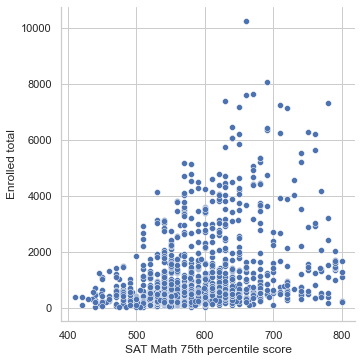

In [34]:
data =  df[["SAT Math 75th percentile score", "Enrolled total"]]
print(f"Total datapoints {len(data)}")
print("Missing data:")
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

sns.relplot(data = data, x = "SAT Math 75th percentile score", y = "Enrolled total")

Total datapoints 1534
Missing data:
SAT Math 75th percentile score    352
Undergraduate enrollment            2
dtype: int64
SAT Math 75th percentile score    0
Undergraduate enrollment          0
dtype: int64


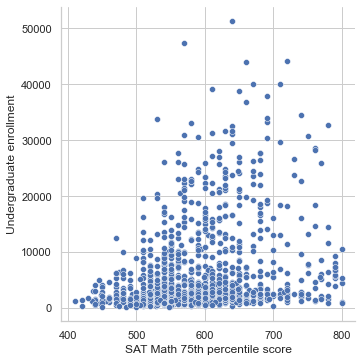

In [35]:
data =  df[["SAT Math 75th percentile score", "Undergraduate enrollment"]]
print(f"Total datapoints {len(data)}")
print("Missing data:")
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

sns.relplot(data = data, x = "SAT Math 75th percentile score", y = "Undergraduate enrollment")

In [40]:
continuous_cols = [col for col in df.columns if df[col].dtype not in ['object', 'int64']]

In [42]:
continuous_df = df[continuous_cols]
display(continuous_df.head())

,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,"Estimated enrollment, total","Estimated enrollment, full time","Estimated enrollment, part time","Estimated undergraduate enrollment, total","Estimated undergraduate enrollment, full time","Estimated undergraduate enrollment, part time","Estimated freshman undergraduate enrollment, total","Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Estimated graduate enrollment, total","Estimated graduate enrollment, full time","Estimated graduate enrollment, part time",Associate's degrees awarded,Bachelor's degrees awarded,Master's degrees awarded,Doctor's degrese - research/scholarship awarded,Doctor's degrees - professional practice awarded,Doctor's degrees - other awarded,Certificates of less than 1-year awarded,Certificates of 1 but less than 2-years awarded,Certificates of 2 but less than 4-years awarded,Postbaccalaureate certificates awarded,Post-master's certificates awarded,Number of students receiving an Associate's degree,Number of students receiving a Bachelor's degree,Number of students receiving a Master's degree,Number of students receiving a Doctor's degree,Number of students receiving a certificate of less than 1-year,Number of students receiving a certificate of 1 but less than 4-years,Number of students receiving a Postbaccalaureate or Post-master's certificate,Percent admitted - total,Admissions yield - total,"Tuition and fees, 2010-11","Tuition and fees, 2011-12","Tuition and fees, 2012-13","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,Part-time enrollment,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Percent of undergraduate enrollment that are American Indian or Alaska Native,Percent of undergraduate enrollment that are Asian,Percent of undergraduate enrollment that are Black or African American,Percent of undergraduate enrollment that are Hispanic/Latino,Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of undergraduate enrollment that are White,Percent of undergraduate enrollment that are two or more races,Percent of undergraduate enrollment that are Race/ethnicity unknown,Percent of undergraduate enrollment that are Nonresident Alien,Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are American Indian or Alaska Native,Percent of graduate enrollment that are Asian,Percent of graduate enrollment that are Black or African American,Percent of graduate enrollment that are Hispanic/Latino,Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander,Percent of graduate enrollment tha

KeyboardInterrupt: 

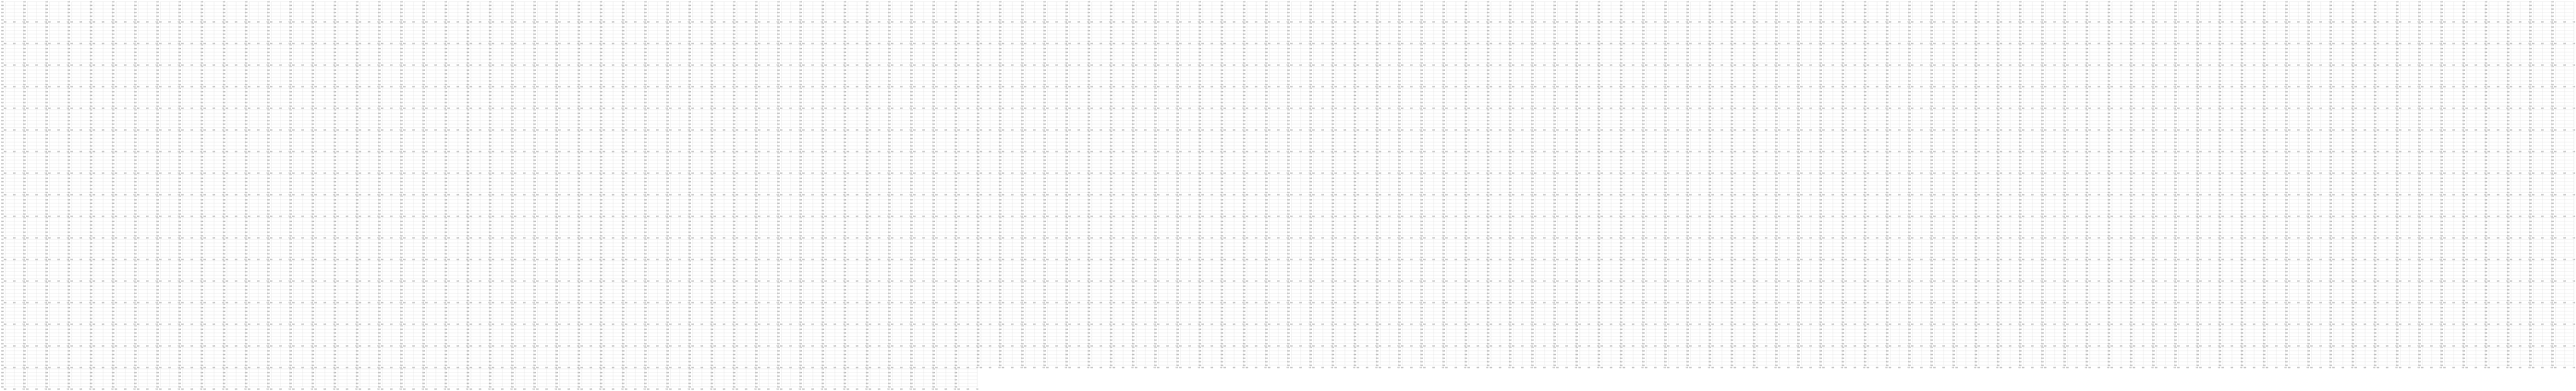

In [43]:
sns.pairplot(continuous_df)